## PARTE 3 : Aplicación empírica 

Nombres:  

* Almendra Quispe Robladillo (20193348)

* -

Evaluación de impacto de las leyes de "Doctrina del Castillo"

Los autores usan datos de crímenes entre 2000 y 2010 en distintos de EEUU

Lo que se quiere evaluar es si se disuaden delitos o aumentan los homicidios

In [168]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm                
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore") 
np.random.seed(12345)

In [169]:
data=pd.read_excel("../PC 1 _ Est. Aplicada/castle.xlsx")
data

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare
0,Alabama,1,2000,2006.0,2.027356,4.1,348.838283,14.705981,44851,605.325500,212.261169,1018.497009
1,Alabama,1,2001,2006.0,2.164867,4.7,351.825374,15.750203,43301,614.792053,221.890289,1068.928589
2,Alabama,1,2002,2006.0,1.936334,5.4,311.494545,15.556559,45573,640.104919,257.726379,1139.962646
3,Alabama,1,2003,2006.0,1.919567,5.5,348.562039,15.447802,44165,636.491699,270.940002,1224.665894
4,Alabama,1,2004,2006.0,1.749841,5.1,327.914974,16.252654,42280,586.400574,264.961548,1194.543579
...,...,...,...,...,...,...,...,...,...,...,...,...
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824
546,Wyoming,51,2007,NaN,1.407384,3.0,406.969053,9.366708,51257,405.412781,101.613235,1248.388794
547,Wyoming,51,2008,NaN,0.830815,3.2,388.078029,9.460956,54012,398.597626,115.811226,1271.054688
548,Wyoming,51,2009,NaN,0.741671,5.9,395.458337,10.301384,53336,396.030914,128.450577,1366.883911


In [170]:
print("Número de observaciones:", len(data)) 

Número de observaciones: 550


In [171]:
data.head()

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare
0,Alabama,1,2000,2006.0,2.027356,4.1,348.838283,14.705981,44851,605.325500,212.261169,1018.497009
1,Alabama,1,2001,2006.0,2.164867,4.7,351.825374,15.750203,43301,614.792053,221.890289,1068.928589
2,Alabama,1,2002,2006.0,1.936334,5.4,311.494545,15.556559,45573,640.104919,257.726379,1139.962646
3,Alabama,1,2003,2006.0,1.919567,5.5,348.562039,15.447802,44165,636.491699,270.940002,1224.665894
4,Alabama,1,2004,2006.0,1.749841,5.1,327.914974,16.252654,42280,586.400574,264.961548,1194.543579


In [172]:
data.tail()

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824
546,Wyoming,51,2007,NaN,1.407384,3.0,406.969053,9.366708,51257,405.412781,101.613235,1248.388794
547,Wyoming,51,2008,NaN,0.830815,3.2,388.078029,9.460956,54012,398.597626,115.811226,1271.054688
548,Wyoming,51,2009,NaN,0.741671,5.9,395.458337,10.301384,53336,396.030914,128.450577,1366.883911
549,Wyoming,51,2010,NaN,0.362429,6.9,352.378917,10.089136,52359,379.319214,132.158264,1318.240234


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          550 non-null    object 
 1   sid            550 non-null    int64  
 2   year           550 non-null    int64  
 3   effyear        231 non-null    float64
 4   lhomicide      550 non-null    float64
 5   unemployrt     550 non-null    float64
 6   police         550 non-null    float64
 7   poverty        550 non-null    float64
 8   income         550 non-null    int64  
 9   prisoner       550 non-null    float64
 10  expsubsidy     550 non-null    float64
 11  exppubwelfare  550 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 51.7+ KB


## 8. Creación de variable

Cree una variable que indique si la observación pertenece al grupo de control o al de tratamiento. Explique cómo construyó esta variable. ¿Cuántas observaciones pertenecen al grupo de tratamiento y cuántos al grupo de control? (1 punto)

Se quiere una variable que identifique el grupo de control y otro de tratamiento. El estudio pretende evaluar  si se disuaden delitos o aumentan los homicidios en los estados en los que se aplica "Doctrina del Castillo".

"effyear" = año en el que se implmentó la ley en cada estado

Para identificar los estados en los que se aplico las leyes usaremos "effyear", ya que la variable proporciona información sobre el año en que se aplicó, y en caso no se aplique se muesta como missing value.

Los estados en los que se aplicó serán nuestros tratados;y los estados en los que nó se aplicó (missings) serán nuestros controles

In [174]:
# Nos fijamos en los datos de "effyear"
data["effyear"].value_counts()
# debido a que hay estados en los que se aplico la ley antes del 2006, sacaremos los demás años de la muestra

effyear
2006.0    143
2007.0     44
2008.0     22
2005.0     11
2009.0     11
Name: count, dtype: int64

In [175]:
# verificamos en el numero de missings
num_nan = data['effyear'].isna().sum()
print("La cantidad de missings es:", num_nan)
# Los missings serán nuestro grupo control

La cantidad de missings es: 319


In [176]:
# Creamos un df que acote al año 2006, pues tenemos otros años que no son de nuestro estudio.
# Segun lo indicado en el enunciado principal del ejercicio

# reemplazamos los NaN de effyear con  '999' para que los valores no se borren
data['effyear'].fillna(999, inplace=True)
# Nos quedamos con los valores missings y el 2006
data = data.loc[(data['effyear'] == 2006) | (data['effyear'] == 999)]
# reemplazamos los 999 como NaN (missings)
data['effyear'].replace(999, np.nan, inplace=True)

In [177]:
print("Número de observaciones después del filtro:", len(data)) 

Número de observaciones después del filtro: 462


In [178]:
data["effyear"].value_counts()

effyear
2006.0    143
Name: count, dtype: int64

In [179]:
data['tratados'] = data['effyear'].apply(lambda x: '1' if pd.notnull(x) else '0')
data
# si toma el valor de 1 es TRATADO, 0 es CONTROL

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados
0,Alabama,1,2000,2006.0,2.027356,4.1,348.838283,14.705981,44851,605.325500,212.261169,1018.497009,1
1,Alabama,1,2001,2006.0,2.164867,4.7,351.825374,15.750203,43301,614.792053,221.890289,1068.928589,1
2,Alabama,1,2002,2006.0,1.936334,5.4,311.494545,15.556559,45573,640.104919,257.726379,1139.962646,1
3,Alabama,1,2003,2006.0,1.919567,5.5,348.562039,15.447802,44165,636.491699,270.940002,1224.665894,1
4,Alabama,1,2004,2006.0,1.749841,5.1,327.914974,16.252654,42280,586.400574,264.961548,1194.543579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824,0
546,Wyoming,51,2007,NaN,1.407384,3.0,406.969053,9.366708,51257,405.412781,101.613235,1248.388794,0
547,Wyoming,51,2008,NaN,0.830815,3.2,388.078029,9.460956,54012,398.597626,115.811226,1271.054688,0
548,Wyoming,51,2009,NaN,0.741671,5.9,395.458337,10.301384,53336,396.030914,128.450577,1366.883911,0


In [180]:
conteo_valores = data['tratados'].value_counts()

# numero de observaciones que pertenecen al grupo de tratamiento
print("Número de tratados:", conteo_valores[1])
# numero de observaciones que pertenecen al grupo de control
print("Número de controles:", conteo_valores[0])

Número de tratados: 143
Número de controles: 319


## 9. ¿Se puede afirmar que esta base de datos proviene de un diseño experimental?

Solo trabajar con los estados que implementaron esta ley en 2006 como muestra del grupo de tratamiento. En base a su respuesta, ¿qué modelo (de los vistos en clase) sería el menos indicado para estimar el efecto causal de la aplicación de la ley? ¿Por qué? (2 puntos)

In [181]:
# Se menciona que debemos trabajar con los estados que implementaron la muestra en el 2006 
# como muestra del grupo de tratamiento, lo cual se hizo en el ejercicio anterior.
data['tratados'] = data['tratados'].astype(float)
data

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados
0,Alabama,1,2000,2006.0,2.027356,4.1,348.838283,14.705981,44851,605.325500,212.261169,1018.497009,1.0
1,Alabama,1,2001,2006.0,2.164867,4.7,351.825374,15.750203,43301,614.792053,221.890289,1068.928589,1.0
2,Alabama,1,2002,2006.0,1.936334,5.4,311.494545,15.556559,45573,640.104919,257.726379,1139.962646,1.0
3,Alabama,1,2003,2006.0,1.919567,5.5,348.562039,15.447802,44165,636.491699,270.940002,1224.665894,1.0
4,Alabama,1,2004,2006.0,1.749841,5.1,327.914974,16.252654,42280,586.400574,264.961548,1194.543579,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824,0.0
546,Wyoming,51,2007,NaN,1.407384,3.0,406.969053,9.366708,51257,405.412781,101.613235,1248.388794,0.0
547,Wyoming,51,2008,NaN,0.830815,3.2,388.078029,9.460956,54012,398.597626,115.811226,1271.054688,0.0
548,Wyoming,51,2009,NaN,0.741671,5.9,395.458337,10.301384,53336,396.030914,128.450577,1366.883911,0.0


In [182]:
vars_base = ['unemployrt', 'poverty', 'police', 'income', \
             'prisoner', 'expsubsidy', 'exppubwelfare']

In [183]:
data.groupby('tratados').size()

tratados
0.0    319
1.0    143
dtype: int64

In [184]:
# verificamos el promedio simple
data.groupby('tratados')[vars_base].mean()

,unemployrt,poverty,police,income,prisoner,expsubsidy,exppubwelfare
tratados,,,,,,,
0.0,5.305329,11.098612,310.549536,55245.360502,377.082878,125.349396,1368.360143
1.0,5.913986,14.387578,321.203873,47242.622378,575.387166,128.515045,1278.846028


In [185]:
# ttest para cada variable
test_medias = []
for vars in vars_base:
  y = data.loc[data.tratados == 1, vars].squeeze()
  x = data.loc[data.tratados == 0, vars].squeeze()
  p_val = pg.ttest(x=x, y=y, alternative='two-sided', \
                   correction=False).iloc[0]['p-val']
  test_medias.append(
        {
            'Variable': vars,
            'p-value': p_val,
        }
        )

pd.DataFrame(test_medias).round(5)

,Variable,p-value
0,unemployrt,0.00247
1,poverty,0.00000
2,police,0.09642
3,income,0.00000
4,prisoner,0.00000
5,expsubsidy,0.59173
6,exppubwelfare,0.02992


Entonces para: 

* unemployrt:el p-value es 0.00247; lo cual quiere decir que hay una diferencia significativa en la tasa de desempleo entre los grupos tratados y no tratados.

* poverty: el p-value es 0.000; lo cual quiere decir que hay una diferencia extremadamente significativa en la tasa de pobreza entre los grupos tratados y no tratados.

* police: el p-value es 0.09642; lo cual quiere decir que no hay una diferencia significativa en el número de policías por 100 mil habitantes entre los grupos tratados y no tratados.

* income: el p-value es 0.000; lo cual quiere decir que hay una diferencia extremadamente significativa en el promedio de ingreso de las familias entre los grupos tratados y no tratados.

* prisoner: el p-value es 0.000; lo cual quiere decir que hay una diferencia extremadamente significativa en el número de prisioneros por 100 mil habitantes entre los grupos tratados y no tratados.

* expsubsidy: el p-value es 0.59173; lo cual quiere decir que no hay una diferencia significativa en el gasto de subsidios entre los grupos tratados y no tratados.

* exppubwelfare: el p-value es 0.02992; lo cual quiere decir que hay una diferencia significativa en el gasto de bienestar público entre los grupos tratados y no tratados.

Por lo tanto hay diferencias significativas para: unemployrt, poverty, income, prisoner, exppubwelfare

Y no hay una diferencia significativa para: police y expsubsidy

**<span style="color:green">¿Se puede afirmar que esta base de datos proviene de un diseño experimental ?**

Por lo tanto, no se puede afirmar que sea un diseño experimental, debido a que si hay diferencias significativas entre los grupos de control y tratado, es decir que no se encuentran balanceados.

**<span style="color:green">¿Qué modelo sería el menos indicado?¿Por qué?**

El modelo menos indicado para medir el estimar el efecto causal de la aplicación sería usar un modelo experimental, lo que sí es posible 
es usar un modelo cuasi-experimental como (Diferencias en Diferencias, Propensity Score Matching o  Regresión Discontinua).


## 10. Plantee un modelo: diseño 2x2 de diferencias en diferencias

Plantee un modelo (o varios) que evalúe el impacto de la aplicación de esta ley sobre el número de homicidios haciendo uso de un diseño 2x2 de diferencias en diferencias y estímelo(s). 

Solo trabajaremos con los estados que implementaron esta ley en 2006 como muestra del grupo de tratamiento. 

In [186]:
# Como se aplicará un modelo DiD se necesita compara en un rango de tiempo más corto del que tenemos en la base de datos original.
data['year'].value_counts()
# Se tomará un espacio de :::: años

year
2000    42
2001    42
2002    42
2003    42
2004    42
2005    42
2006    42
2007    42
2008    42
2009    42
2010    42
Name: count, dtype: int64

In [187]:
data_did=data[data['year'].isin([2004, 2005, 2006, 2007, 2008])]

In [188]:
data_did

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados
4,Alabama,1,2004,2006.0,1.749841,5.1,327.914974,16.252654,42280,586.400574,264.961548,1194.543579,1.0
5,Alabama,1,2005,2006.0,2.130440,3.9,287.807160,16.872982,41491,627.746460,78.911873,1103.141846,1.0
6,Alabama,1,2006,2006.0,2.079652,3.6,341.311103,16.167670,41041,614.064270,83.175766,1061.683716,1.0
7,Alabama,1,2007,2006.0,2.145690,3.5,356.462199,16.358774,44388,641.357178,93.832405,1093.531494,1.0
8,Alabama,1,2008,2006.0,2.043598,4.9,349.638103,15.606914,45039,659.581970,91.432053,1003.311646,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,Wyoming,51,2004,NaN,0.803502,3.9,399.160261,10.415728,52401,402.002716,93.219261,1174.182983,0.0
544,Wyoming,51,2005,NaN,1.039213,3.7,361.854991,10.555787,49943,413.346619,86.177895,1218.913818,0.0
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824,0.0
546,Wyoming,51,2007,NaN,1.407384,3.0,406.969053,9.366708,51257,405.412781,101.613235,1248.388794,0.0


In [189]:
# Lista de años específicos
years_especificos = [2006, 2008]

# Itera sobre cada año y crea una nueva columna para ese año si es igual al año específico
for year in years_especificos:
    # Crea el nombre de la nueva columna para el año específico
    columna_nombre = 'lhomicide' + str(year)[-2:]
    # Asigna los valores de 'lhomicide' a la nueva columna donde 'year' es igual al año específico
    data_did[columna_nombre] = data_did['lhomicide'].where(data_did['year'] == year)
# Reemplaza los valores NaN por 0 en las columnas 'lhomicide05', 'lhomicide06' y 'lhomicide08'
data_did['lhomicide06'].fillna(0, inplace=True)
data_did['lhomicide08'].fillna(0, inplace=True)
data_did
# Muestra el DataFrame actualizado
data_did

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados,lhomicide06,lhomicide08
4,Alabama,1,2004,2006.0,1.749841,5.1,327.914974,16.252654,42280,586.400574,264.961548,1194.543579,1.0,0.000000,0.000000
5,Alabama,1,2005,2006.0,2.130440,3.9,287.807160,16.872982,41491,627.746460,78.911873,1103.141846,1.0,0.000000,0.000000
6,Alabama,1,2006,2006.0,2.079652,3.6,341.311103,16.167670,41041,614.064270,83.175766,1061.683716,1.0,2.079652,0.000000
7,Alabama,1,2007,2006.0,2.145690,3.5,356.462199,16.358774,44388,641.357178,93.832405,1093.531494,1.0,0.000000,0.000000
8,Alabama,1,2008,2006.0,2.043598,4.9,349.638103,15.606914,45039,659.581970,91.432053,1003.311646,1.0,0.000000,2.043598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,Wyoming,51,2004,NaN,0.803502,3.9,399.160261,10.415728,52401,402.002716,93.219261,1174.182983,0.0,0.000000,0.000000
544,Wyoming,51,2005,NaN,1.039213,3.7,361.854991,10.555787,49943,413.346619,86.177895,1218.913818,0.0,0.000000,0.000000
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824,0.0,0.925945,0.000000
546,Wyoming,51,2007,NaN,1.407384,3.0,406.969053,9.366708,51257,405.412781,101.613235,1248.388794,0.0,0.000000,0.000000


In [190]:
# promedio de las variables de ingresos
lhomicide_promedio = (data_did[[ 'lhomicide06', 'lhomicide08', 'tratados']]
               .groupby('tratados').mean())
lhomicide_promedio.reset_index(inplace=True)
lhomicide_promedio

,tratados,lhomicide06,lhomicide08
0,0.0,0.253897,0.249718
1,1.0,0.373999,0.360972


In [191]:
# Pasamos a formato long
value_vars = ['lhomicide06', 'lhomicide08']

lhomicide_promedio_long = lhomicide_promedio.melt(id_vars='tratados',
                                                  value_vars=value_vars,
                                                  value_name='lhomicide',
                                                  var_name='year')

# Imprime el DataFrame en formato long
lhomicide_promedio_long


,tratados,year,lhomicide
0,0.0,lhomicide06,0.253897
1,1.0,lhomicide06,0.373999
2,0.0,lhomicide08,0.249718
3,1.0,lhomicide08,0.360972


In [192]:
años = {'lhomicide06':2006,
        'lhomicide08':2008}
lhomicide_promedio_long['year'] = lhomicide_promedio_long['year'].map(años)
lhomicide_promedio_long

,tratados,year,lhomicide
0,0.0,2006,0.253897
1,1.0,2006,0.373999
2,0.0,2008,0.249718
3,1.0,2008,0.360972


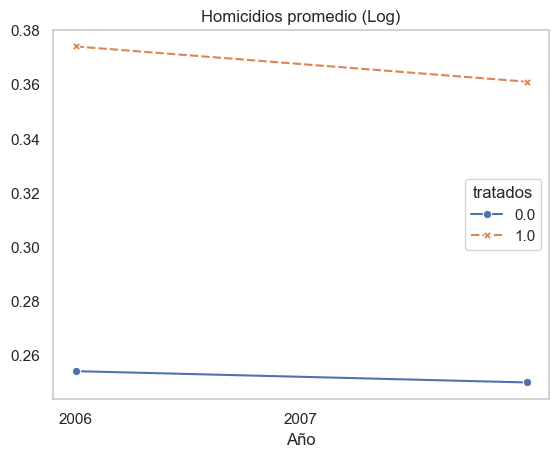

In [193]:

sns.lineplot(data=lhomicide_promedio_long, x='year', y='lhomicide',
             hue='tratados', style='tratados', 
             markers=True)
plt.xticks(range(2006, 2008))

plt.xlabel("Año"); plt.ylabel("")
plt.title("Homicidios promedio (Log)")
plt.grid(); plt.show()

Como se puede observar en el gráfico, para el grupo control (linea azul) hay una disminución; peropara el grupo tratados (naranja) hay una mayor disminución de log de número de homicidios. Lo cual se puede puede atribuir al efecto del tratamiento el cual es la aplicación de la "Doctrina del Castillo".

In [194]:
# Calculamos las diferencias de ingresos
simple_did0806 = ((lhomicide_promedio['lhomicide08']-lhomicide_promedio['lhomicide06'])
                  .diff()[1].round(4))

print('Mediante simple diferencias y diferencias, el efecto del \
tratamiento es de', simple_did0806, 'entre los años 2006 y 2008.')

Mediante simple diferencias y diferencias, el efecto del tratamiento es de -0.0088 entre los años 2006 y 2008.


## Estimación

In [195]:
# análisis de 2008 vs 2006
DiD0806 = data_did[data_did['year'].isin([2006,2008])]
DiD0806['año'] = DiD0806['year']

DiD0806.loc[DiD0806.año==2006, 'año'] = 0
DiD0806.loc[DiD0806.año==2008, 'año'] = 1

DiD0806['did'] = (DiD0806['año']*DiD0806['tratados'])

DiD0806

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados,lhomicide06,lhomicide08,año,did
6,Alabama,1,2006,2006.0,2.079652,3.6,341.311103,16.167670,41041,614.064270,83.175766,1061.683716,1.0,2.079652,0.000000,0,0.0
8,Alabama,1,2008,2006.0,2.043598,4.9,349.638103,15.606914,45039,659.581970,91.432053,1003.311646,1.0,0.000000,2.043598,1,1.0
17,Alaska,2,2006,2006.0,1.681332,6.7,289.081610,10.614086,61010,756.507324,309.268982,2423.847168,1.0,1.681332,0.000000,0,0.0
19,Alaska,2,2008,2006.0,1.377100,6.9,288.153134,9.082182,64798,736.016235,266.823181,2196.167236,1.0,0.000000,1.377100,1,1.0
28,Arizona,3,2006,2006.0,2.143614,4.1,347.598032,13.952492,50454,582.065369,80.902359,1180.550415,1.0,2.143614,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Washington,48,2008,NaN,1.095547,5.6,232.137104,11.268350,57347,277.789703,214.130783,1194.762207,0.0,0.000000,1.095547,1,0.0
534,Wisconsin,50,2006,NaN,1.088391,4.7,325.942238,10.606971,55899,421.685852,99.489006,1188.717773,0.0,1.088391,0.000000,0,0.0
536,Wisconsin,50,2008,NaN,0.958531,5.0,333.092017,10.245223,51848,417.615356,95.293297,1180.267822,0.0,0.000000,0.958531,1,0.0
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824,0.0,0.925945,0.000000,0,0.0


In [196]:
mod0805 = smf.ols(' lhomicide ~ tratados + año + did', 
                  data=DiD0806).fit()
print(mod0805.summary())

                            OLS Regression Results                            
Dep. Variable:              lhomicide   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     8.026
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           9.67e-05
Time:                        00:01:03   Log-Likelihood:                -59.055
No. Observations:                  84   AIC:                             126.1
Df Residuals:                      80   BIC:                             135.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2695      0.093     13.650      0.0

Cuando estimamos por MCO nos resulta que el impacto de que se haya dado el tratamiento es de -0.0442, aunque no es significativo. Es decir que la aplicación de la ley disminuye los homicidios.

In [197]:
## Usando un modelo paramétrico con las variables de control
# Var control : unemployrt, police, poverty, income, prisoner,expsubsidy, exppubwelfare  
# se estima este modelo debido a que se quiere obtener le estimación cuando se añadimos variables control, las cuales en teoría mejorarían e resultado.
mod0805c = smf.ols(' lhomicide ~ tratados + año + did + \
                  unemployrt + police + poverty + income + \
                  prisoner + expsubsidy + exppubwelfare', 
                  data=DiD0806).fit()
print(mod0805c.summary())

                            OLS Regression Results                            
Dep. Variable:              lhomicide   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     11.91
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           6.97e-12
Time:                        00:01:03   Log-Likelihood:                -29.465
No. Observations:                  84   AIC:                             80.93
Df Residuals:                      73   BIC:                             107.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.3190      0.944     -1.397

Cuando estimamos por MCO con variables de control,nos resulta que el impacto de que se haya dado el tratamiento es de 0.0101. Es decir que la aplicación de la ley aumenta los homicidios.

## 11. Plantee un modelo: aplicando propensity score matching (PSM)

Plantee un modelo (o varios) que evalúe el impacto de la aplicación de esta ley sobre el número de homicidios aplicando propensity score matching (PSM) y estimelo(s). Para ello, solo trabaje con los estados que implementaron esta ley en 2006 como muestra del grupo de tratamiento. Justifique y explique la especificación de sus modelos a estimar. En base a ello, ¿la aplicación de esta ley tuvo un impacto positivo o negativo sobre el número de homicidios? (3.5 puntos)

In [198]:
# tenemos una base de datos para el modelo PSM
#data_psm=data

In [199]:
#####################
# Lista de años específicos
years_especificos = [2006, 2008]

# Itera sobre cada año y crea una nueva columna para ese año si es igual al año específico
for year in years_especificos:
    # Crea el nombre de la nueva columna para el año específico
    columna_nombre = 'lhomicide' + str(year)[-2:]
    # Asigna los valores de 'lhomicide' a la nueva columna donde 'year' es igual al año específico
    data_psm[columna_nombre] = data_psm['lhomicide'].where(data_psm['year'] == year)
# Reemplaza los valores NaN por 0 en las columnas 'lhomicide05', 'lhomicide06' y 'lhomicide08'
data_psm['lhomicide06'].fillna(0, inplace=True)
data_psm['lhomicide08'].fillna(0, inplace=True)
data_psm
# Muestra el DataFrame actualizado
data_psm

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados,lhomicide06,lhomicide08
0,Alabama,1,2000,2006.0,2.027356,4.1,348.838283,14.705981,44851,605.325500,212.261169,1018.497009,1.0,0.000000,0.000000
1,Alabama,1,2001,2006.0,2.164867,4.7,351.825374,15.750203,43301,614.792053,221.890289,1068.928589,1.0,0.000000,0.000000
2,Alabama,1,2002,2006.0,1.936334,5.4,311.494545,15.556559,45573,640.104919,257.726379,1139.962646,1.0,0.000000,0.000000
3,Alabama,1,2003,2006.0,1.919567,5.5,348.562039,15.447802,44165,636.491699,270.940002,1224.665894,1.0,0.000000,0.000000
4,Alabama,1,2004,2006.0,1.749841,5.1,327.914974,16.252654,42280,586.400574,264.961548,1194.543579,1.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,Wyoming,51,2006,NaN,0.925945,3.2,361.550590,10.044194,50870,410.482239,86.982056,1210.819824,0.0,0.925945,0.000000
546,Wyoming,51,2007,NaN,1.407384,3.0,406.969053,9.366708,51257,405.412781,101.613235,1248.388794,0.0,0.000000,0.000000
547,Wyoming,51,2008,NaN,0.830815,3.2,388.078029,9.460956,54012,398.597626,115.811226,1271.054688,0.0,0.000000,0.830815
548,Wyoming,51,2009,NaN,0.741671,5.9,395.458337,10.301384,53336,396.030914,128.450577,1366.883911,0.0,0.000000,0.000000


In [200]:
#corremos el modelo logit

mod_logit = smf.logit(" tratados ~ unemployrt + poverty + \
                        police + income + prisoner + expsubsidy + exppubwelfare ", 
                      data=data_psm).fit()

print(mod_logit.summary())

Optimization terminated successfully.
         Current function value: 0.361937
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               tratados   No. Observations:                  462
Model:                          Logit   Df Residuals:                      454
Method:                           MLE   Df Model:                            7
Date:                Sat, 27 Apr 2024   Pseudo R-squ.:                  0.4150
Time:                        00:01:04   Log-Likelihood:                -167.21
converged:                       True   LL-Null:                       -285.85
Covariance Type:            nonrobust   LLR p-value:                 1.417e-47
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2633      2.987      2.097      0.036       0.409      12.118
unemployrt        0.

In [201]:
# generamos las probabilidades predichas
ps1 = pd.DataFrame({'ps1': mod_logit.predict()})
data_ps1 = pd.concat([data_psm, ps1], axis=1)
data_ps1

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados,lhomicide06,lhomicide08,ps1
0,Alabama,1.0,2000.0,2006.0,2.027356,4.1,348.838283,14.705981,44851.0,605.325500,212.261169,1018.497009,1.0,0.0,0.0,0.923986
1,Alabama,1.0,2001.0,2006.0,2.164867,4.7,351.825374,15.750203,43301.0,614.792053,221.890289,1068.928589,1.0,0.0,0.0,0.945949
2,Alabama,1.0,2002.0,2006.0,1.936334,5.4,311.494545,15.556559,45573.0,640.104919,257.726379,1139.962646,1.0,0.0,0.0,0.958705
3,Alabama,1.0,2003.0,2006.0,1.919567,5.5,348.562039,15.447802,44165.0,636.491699,270.940002,1224.665894,1.0,0.0,0.0,0.959849
4,Alabama,1.0,2004.0,2006.0,1.749841,5.1,327.914974,16.252654,42280.0,586.400574,264.961548,1194.543579,1.0,0.0,0.0,0.957553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144053
458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.114487
459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083378
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092882


In [202]:
# descripción del propensity score
data_ps1['ps1'].describe().round(4)

count    462.0000
mean       0.3095
std        0.3164
min        0.0007
25%        0.0526
50%        0.1643
75%        0.5191
max        0.9904
Name: ps1, dtype: float64

In [203]:
# nos quedamos con las observaciones
# pertenecientes al soporte común
nsw_cps_ps = data_ps1.copy()

ps_ll = data_ps1[data_ps1.tratados == 1].min(axis=0)['ps1']
ps_ul = data_ps1[data_ps1.tratados == 0].max(axis=0)['ps1'] # en stata nsw_cps_ps1.treated_noexp == 1

print(ps_ll.round(5), ps_ul.round(5))

# para el que es tratado es 0.00134
# para el que no fue tratado (control) es 0.98322

0.00134 0.98322


In [204]:
# soporte común
data_ps1 = data_ps1[(data_ps1['ps1'] >= ps_ll) 
                        & (data_ps1['ps1'] <= ps_ul )]
data_ps1

,state,sid,year,effyear,lhomicide,unemployrt,police,poverty,income,prisoner,expsubsidy,exppubwelfare,tratados,lhomicide06,lhomicide08,ps1
0,Alabama,1.0,2000.0,2006.0,2.027356,4.1,348.838283,14.705981,44851.0,605.325500,212.261169,1018.497009,1.0,0.0,0.0,0.923986
1,Alabama,1.0,2001.0,2006.0,2.164867,4.7,351.825374,15.750203,43301.0,614.792053,221.890289,1068.928589,1.0,0.0,0.0,0.945949
2,Alabama,1.0,2002.0,2006.0,1.936334,5.4,311.494545,15.556559,45573.0,640.104919,257.726379,1139.962646,1.0,0.0,0.0,0.958705
3,Alabama,1.0,2003.0,2006.0,1.919567,5.5,348.562039,15.447802,44165.0,636.491699,270.940002,1224.665894,1.0,0.0,0.0,0.959849
4,Alabama,1.0,2004.0,2006.0,1.749841,5.1,327.914974,16.252654,42280.0,586.400574,264.961548,1194.543579,1.0,0.0,0.0,0.957553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144053
458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.114487
459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.083378
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.092882


In [205]:
# hacemos matching, con K = 1 para un vecino
from causalinference import CausalModel
cm1 = CausalModel(
    Y=data_ps1["lhomicide"].values,
    D=data_ps1["tratados"].values,
    X=data_ps1["ps1"].values
)

cm1.est_via_matching(matches=1, bias_adj=True)
cm1.estimates['matching']['att']
print(cm1.estimates)


Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.505      0.080      6.286      0.000      0.348      0.663
           ATC      0.491      0.082      6.017      0.000      0.331      0.651
           ATT      0.538      0.104      5.190      0.000      0.335      0.742



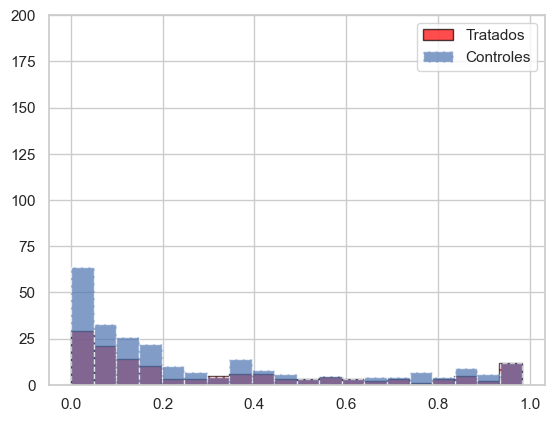

In [206]:
# Viendolo de otra forma: histogramas
plt.hist(data_ps1[data_ps1.tratados==1]['ps1'], 
         alpha=.7, color='red', edgecolor='black', bins = 20, label='Tratados')
 
plt.hist(data_ps1[data_ps1.tratados==0]['ps1'], 
         alpha=.7, bins=20, linestyle='dashed', label='Controles')

plt.ylim(0, 200); plt.legend()
plt.show()

In [207]:
data_ps1[data_ps1.tratados==0]['ps1'].describe()

count    251.000000
mean       0.288213
std        0.303958
min        0.001438
25%        0.049383
50%        0.150353
75%        0.439317
max        0.983219
Name: ps1, dtype: float64

Segun el modelo PSM con k=1, el efecto para los estados en los que se aplicó la ley fue de 0.505, es decir hubo un aumento de los homicidios. Este resultado es significativo.